In [1]:
import pandas as pd 
import numpy as np
import numpy.linalg as lalg
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.regularizers as rg
from sklearn.model_selection import KFold
from Models import *

In [2]:
auto = pd.read_csv("../data/auto-mpg.csv")
auto.fillna(auto.mean())
x = auto[auto.columns[1:7]].to_numpy()
ox = np.insert(x, 0, 1.0, axis = 1)
y = auto[auto.columns[0]].to_numpy()

In [3]:
auto_perceptron = Perceptron(ox, y, 0.1, build_fn = Perceptron.build_model)
forward_pcp = auto_perceptron.forward_selection(5000)
backward_pcp = auto_perceptron.backward_elimination(5000)
step_pcp = auto_perceptron.stepwise_regression(5000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
[0, 6]
-8.34217836640098
[0, 6, 5]
-8.36582945087288
[0, 6, 5, 4]
-8.389600591611137
[0, 6, 5, 4, 3]
-8.413492705075795
[0, 6, 5, 4, 3, 2]
-8.43750671707854
[0, 6, 5, 4, 3, 2, 1]
-9.22860215570006
[0, 1, 2, 3, 4, 5]
-8.43750671707854
[0, 2, 3, 4, 5]
-8.413492705075795
[0, 2, 4, 5]
-8.389600591611137
[0, 4, 5]
-8.36582945087288
[0, 4]
-8.34217836640098
[0]
[0, 6]
[0]


In [4]:
auto_3L = NeuralNet3L(ox, y, build_fn = NeuralNet3L.build_model)
forward_3L = auto_3L.forward_selection()
backward_3L = auto_3L.backward_elimination()
step_3L = auto_3L.stepwise_regression()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 7)                 49        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 8         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
[0, 6]
0.23471594473930324
[0, 6, 4]
0.8488364164210573
[0, 6, 4, 3]
0.8583348360536667
[0, 6, 4, 3, 2]
0.8624373324044788
[0, 6, 4, 3, 2, 5]
0.8643635073866771
[0, 6, 4, 3, 2, 5, 1]
0.8546770768397299
[0, 1, 2, 3, 4, 5]
0.5621274140264307
[0, 1, 2, 3, 5]
0.7555338412750768
[0, 1, 2, 3]
0.7475492538231884
[0, 1, 2]
0.6791546138781536
[0, 2]
0.6841829762314305
[0]
[0, 5]
[0, 5, 2]
[0, 5, 2, 6]
[0, 5, 2, 6, 4]
[0, 5, 2, 6, 4, 1]


In [5]:
auto_4L = NeuralNet4L(ox, y, build_fn = NeuralNet4L.build_model)
forward_4L = auto_4L.forward_selection()
backward_4L = auto_4L.backward_elimination()
step_4L = auto_4L.stepwise_regression()

Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_219 (Dense)            (None, 7)                 49        
_________________________________________________________________
dense_220 (Dense)            (None, 3)                 24        
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 4         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
[0, 5]
0.1738832183558532
[0, 5, 4]
-0.005357072323183498
[0, 5, 4, 6]
0.8483840005500668
[0, 5, 4, 6, 3]
0.8667255968007119
[0, 5, 4, 6, 3, 1]
0.8591521897790384
[0, 5, 4, 6, 3, 1, 2]
0.8704775751704146
[0, 1, 2, 3, 5, 6]
0.8545944279401886
[0, 1, 2, 3, 5]
0.7540644746245319
[0, 2, 3, 5]
0.7095864642089998
[0, 2, 5]
0.6787153798568097
[0, 5]
-0.0025265671388068345
[0]
[0, 6]
[0, 6, 

In [6]:
ridge_perceptron = keras.Sequential()
ridge_perceptron.add(layers.Dense(1, input_dim = 7, 
                                 kernel_initializer = "uniform", 
                                 activation = "relu", 
                                 use_bias = False,
                                 kernel_regularizer = rg.l2(0.01)))

optimizer = keras.optimizers.Adam(learning_rate = 0.0005)
ridge_perceptron.compile(loss = "mean_squared_error", optimizer = optimizer)

In [7]:
ridge_perceptron.fit(ox, y, epochs = 50, batch_size = 10, verbose = 0)
rsq = metrics.rsq(ridge_perceptron, ox, y)
rsq_cv = metrics.rsq_cv(ridge_perceptron, ox, y, epochs = 50)
print(f"Rsq = {rsq} Rsq_cv = {rsq_cv}")

Rsq = 0.6059656739234924 Rsq_cv = 0.7676639065146447


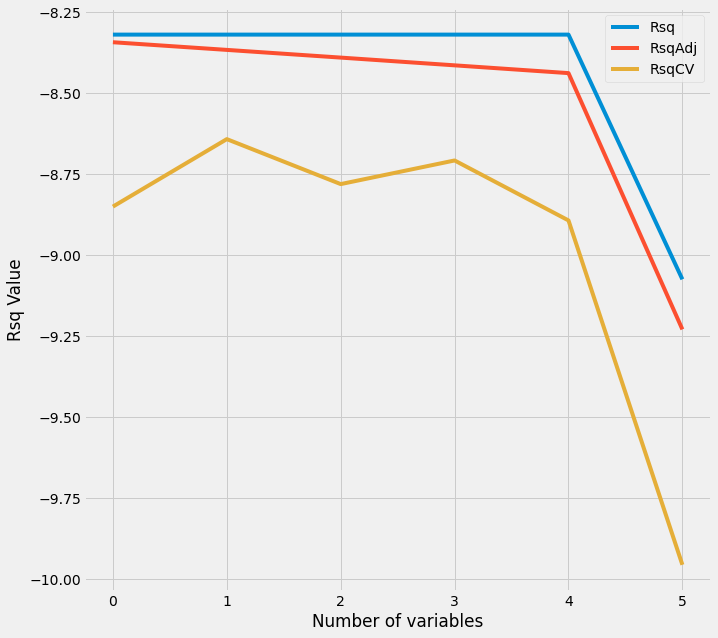

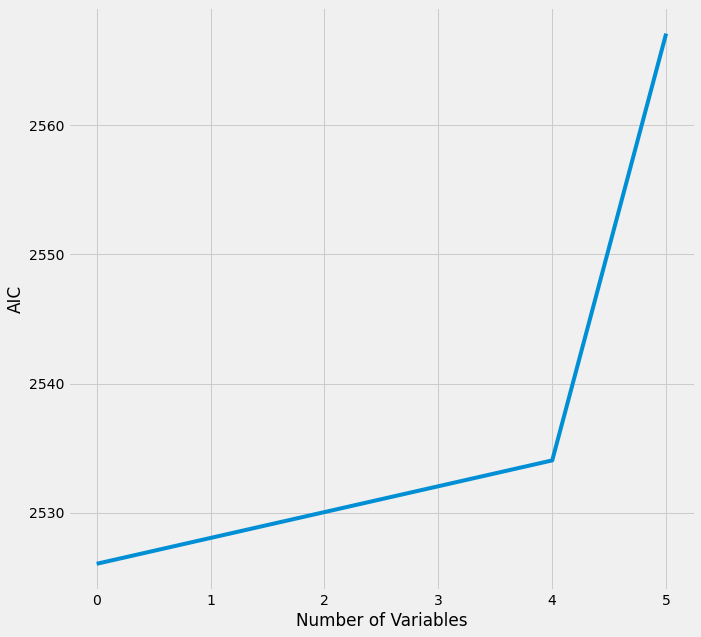

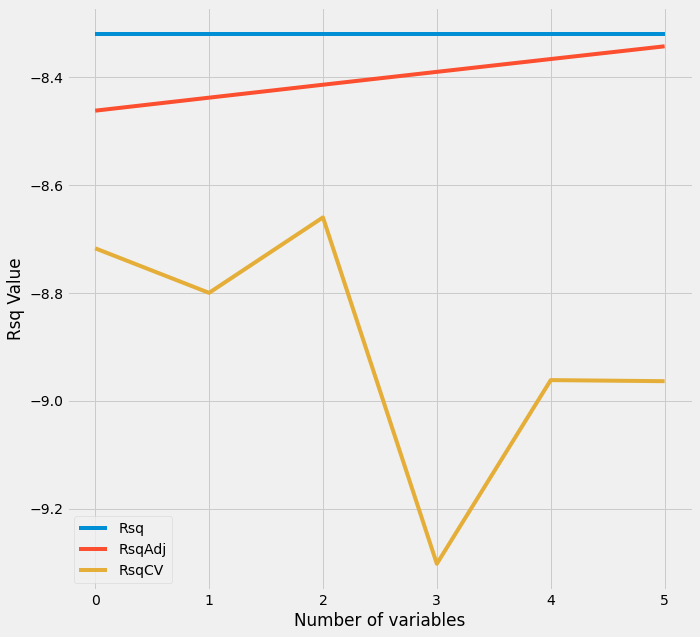

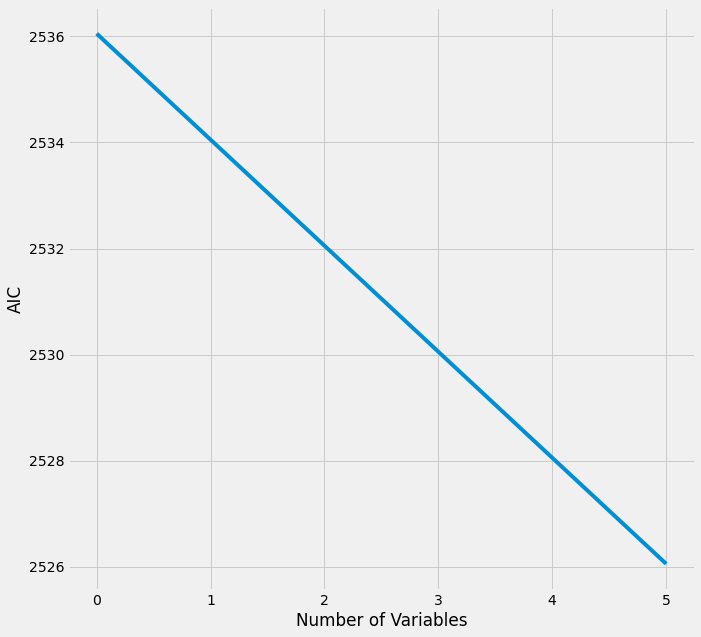

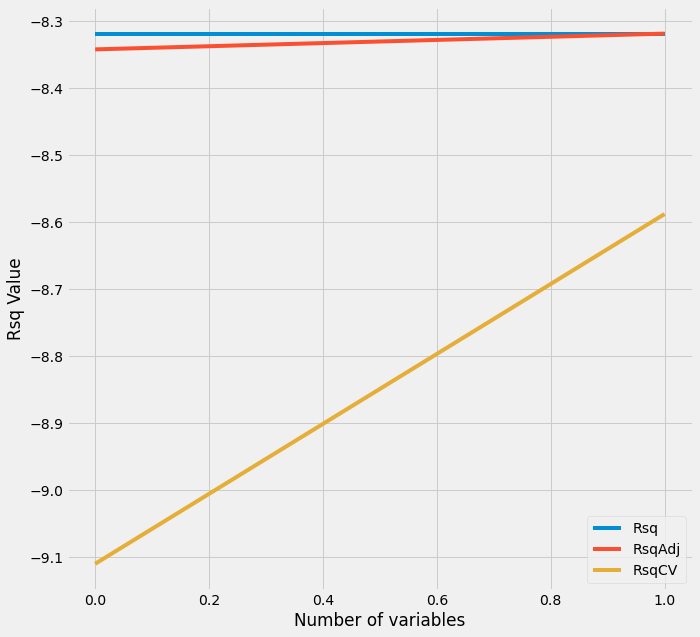

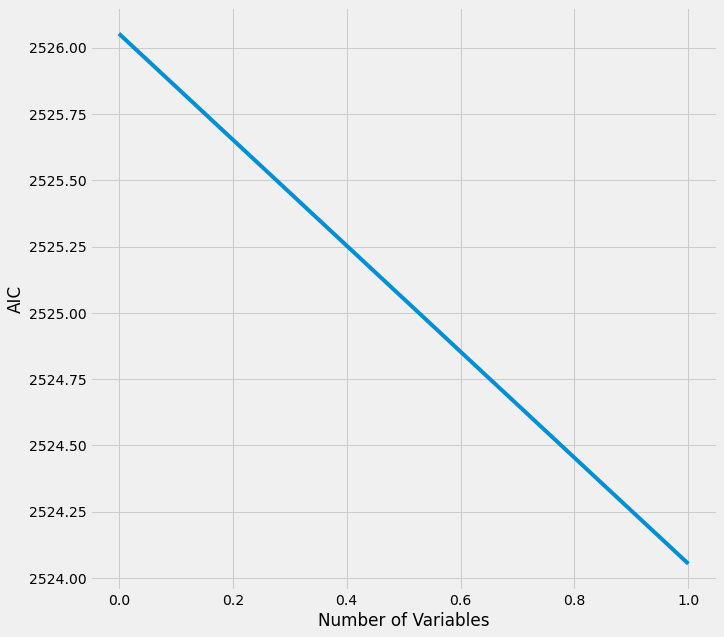

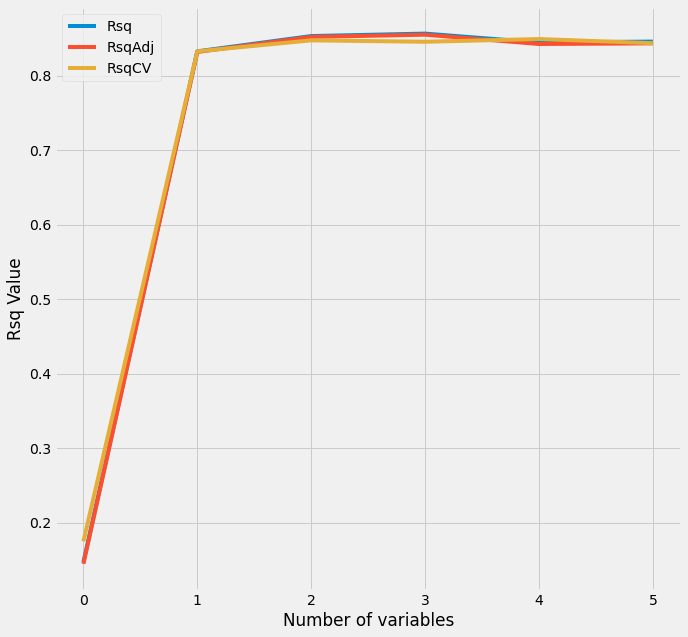

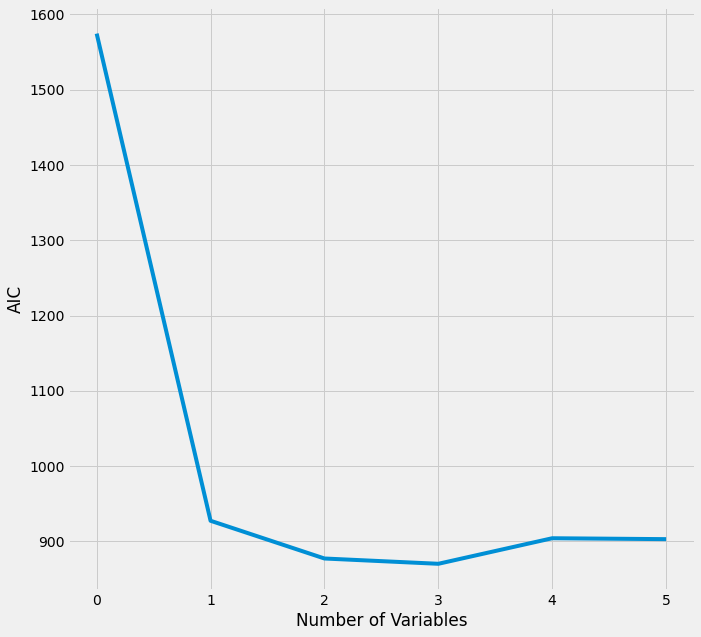

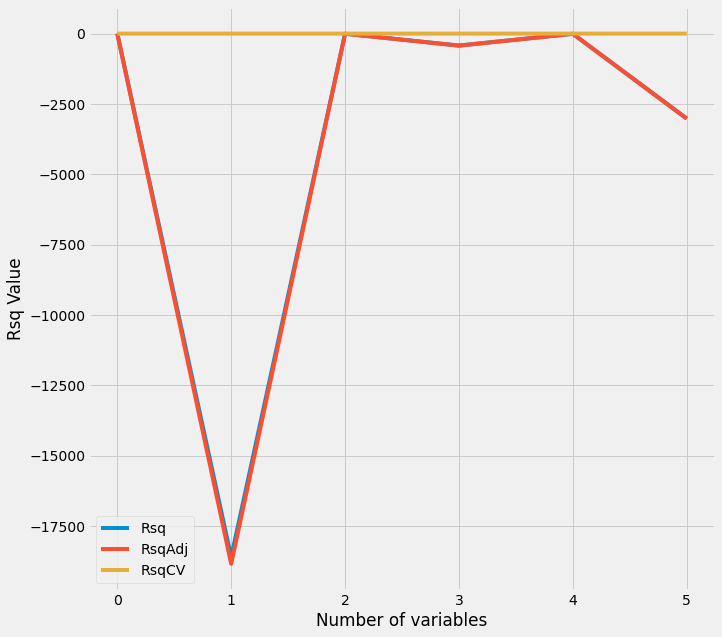

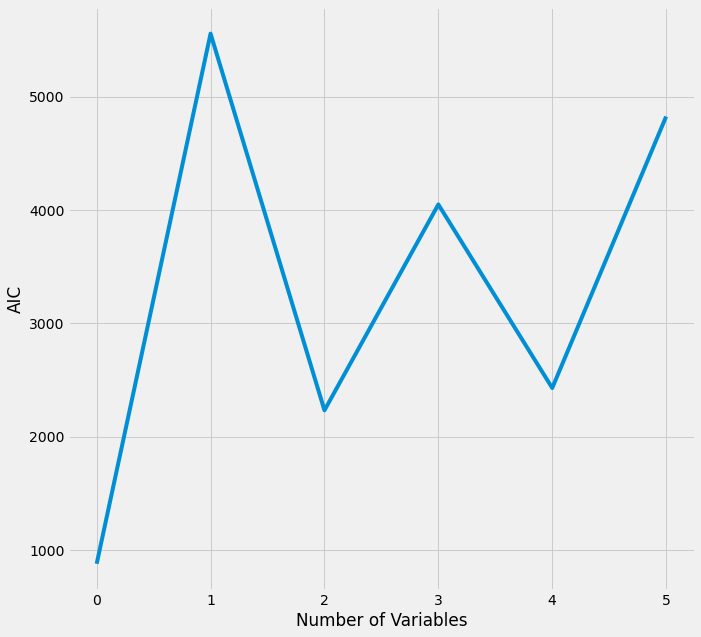

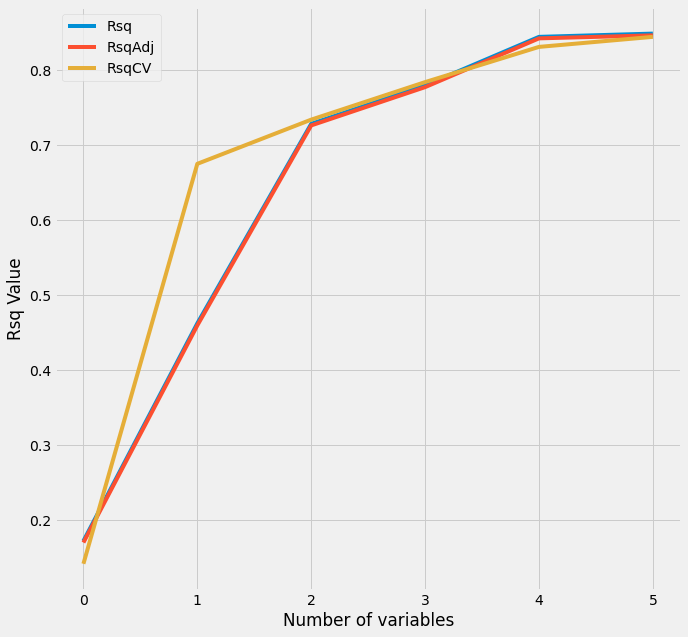

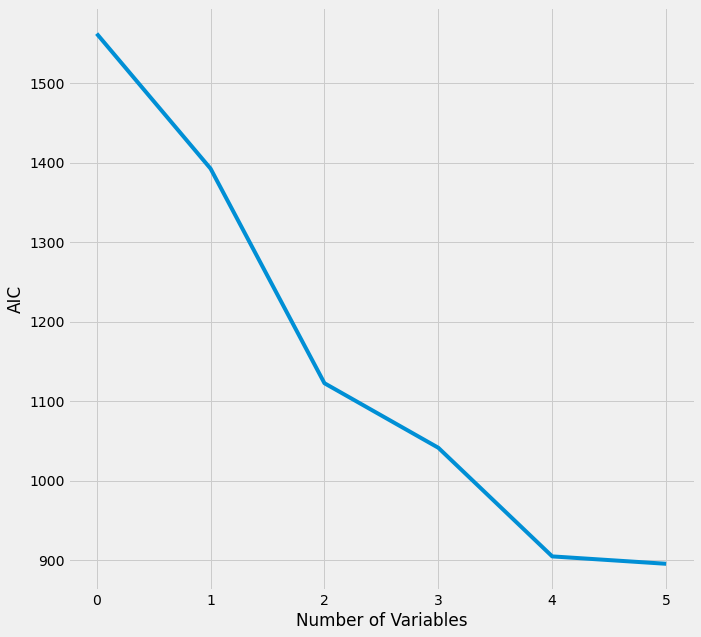

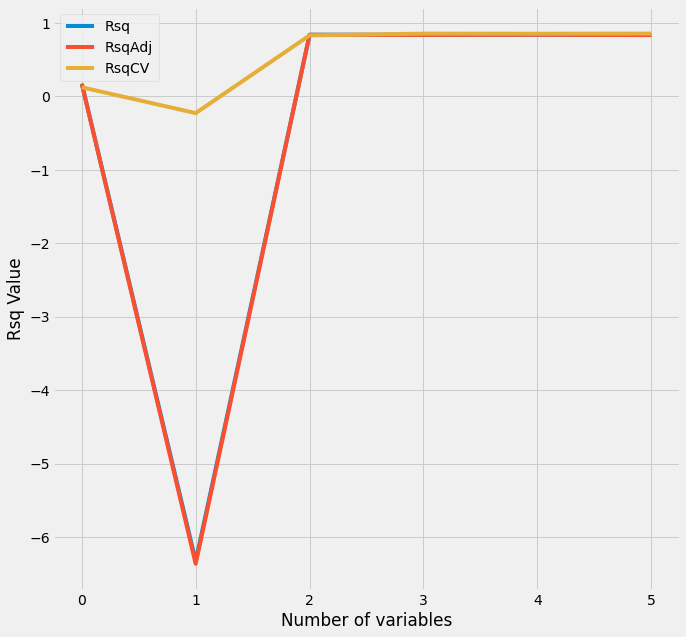

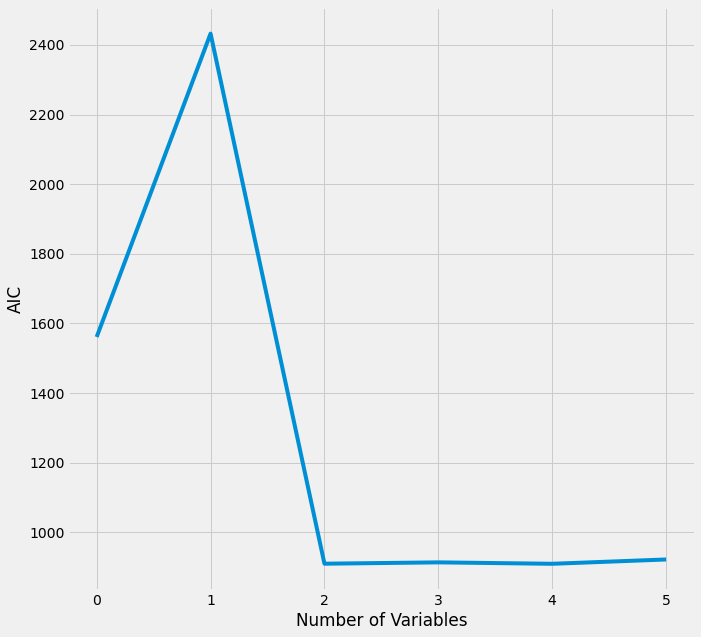

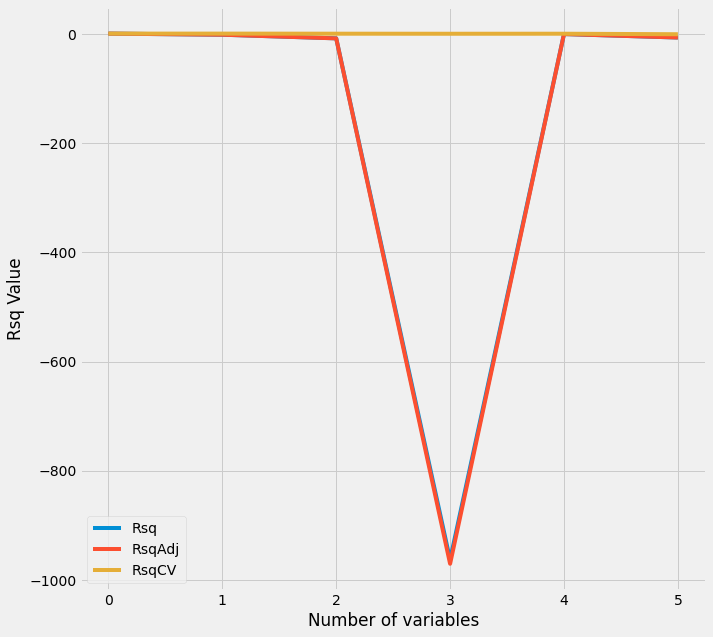

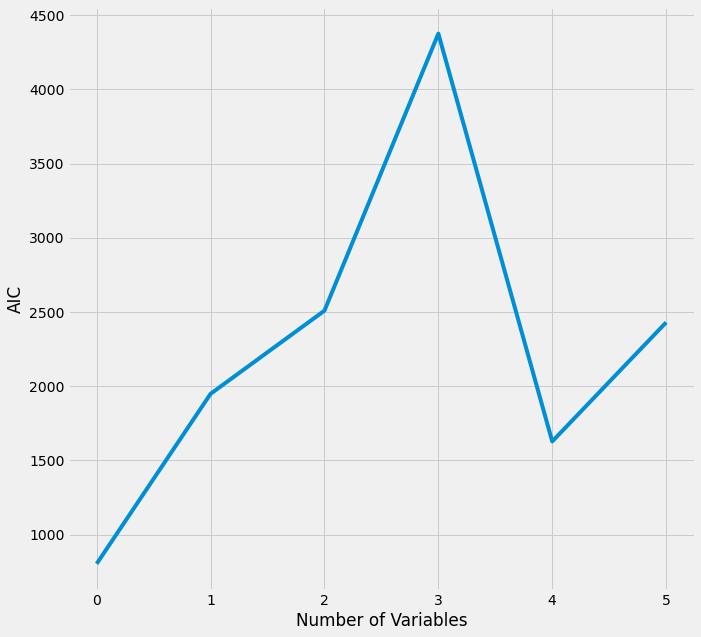

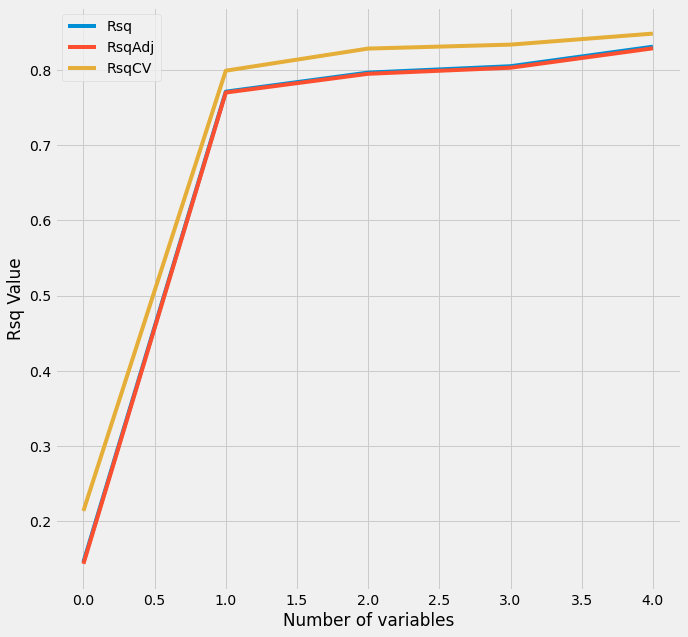

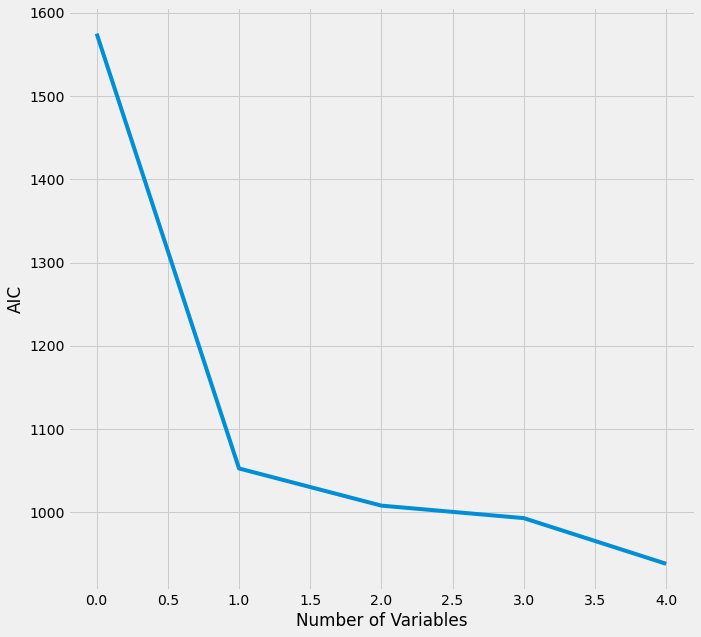

In [8]:
def plot_and_save(arrays, name, basepath = "../plots/python/"): 
    rsq, rsq_a, rsq_cv, aic = arrays
    x = [_ for _ in range(len(rsq))]
    plt.style.use("fivethirtyeight")
    plt.rcParams["figure.figsize"] = [10,10]
    plt.plot(x, np.array([rsq, rsq_a, rsq_cv]).transpose())
    plt.xlabel("Number of variables")
    plt.ylabel("Rsq Value")
    plt.legend(["Rsq", "RsqAdj", "RsqCV"])
    plt.savefig(basepath+name)
    plt.show()
    
    plt.style.use("fivethirtyeight")
    plt.plot(x, aic)
    plt.xlabel("Number of Variables")
    plt.ylabel("AIC")
    plt.savefig(basepath+"AIC"+name)
    plt.show()
    
plot_and_save(forward_pcp, "AutoForwardPCP.png")
plot_and_save(backward_pcp, "BackWardPCP.png")
plot_and_save(step_pcp, "StepwisePCP.png")

plot_and_save(forward_3L, "AutoForward3L.png")
plot_and_save(backward_3L, "BackWard3L.png")
plot_and_save(step_3L, "Stepwise3L.png")

plot_and_save(forward_4L, "AutoForward4L.png")
plot_and_save(backward_4L, "BackWard4L.png")
plot_and_save(step_4L, "Stepwise4L.png")
